<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/ARYA_ExitEXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing  basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# load the dataset
# first 5 rows
df=pd.read_csv("/content/Employee.csv")
df.head(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
#shape of the data
df.shape

(74498, 24)

In [6]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number



*   the employee dataset contains 24 columns and 74498 rows
*   the employee dataset contains integer ,object , string data types
*   some of its columns does not have 74498 entries, which shows the presence of null vales.



In [8]:
# statistical summary
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


**Missing Value**

In [9]:
#null value check
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [125]:
# deleted all the rows with missing value
df=df.dropna()

number of missiing values are small compared to its entries. so decided to drop those rows.

In [38]:
df.shape

(74461, 24)

In [126]:
df=df.drop('Employee ID',axis=1)# dropping unwanted column

In [77]:
num_columns=df.select_dtypes(include=['float64','int64'])

**outliers**

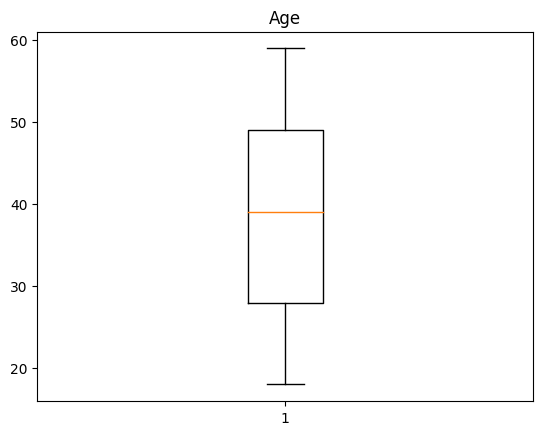

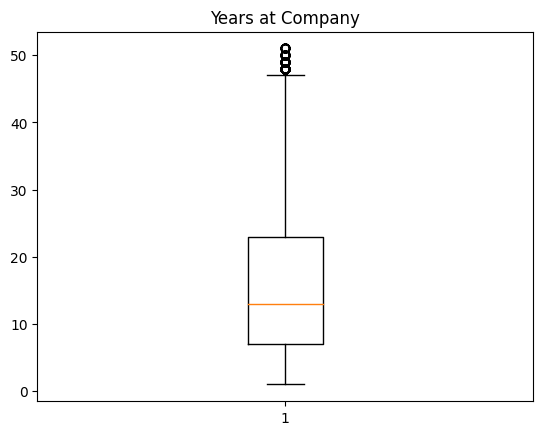

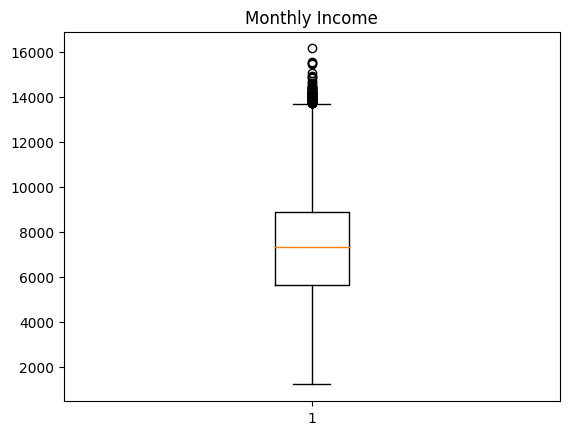

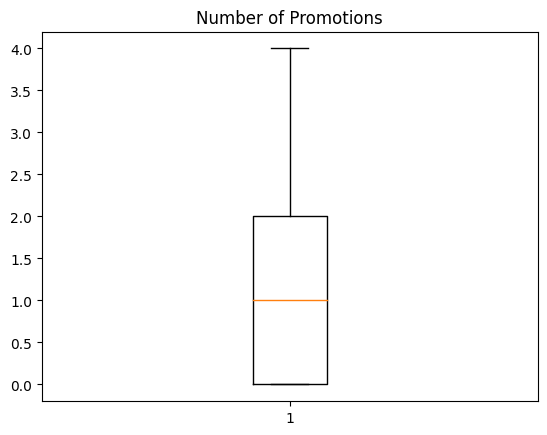

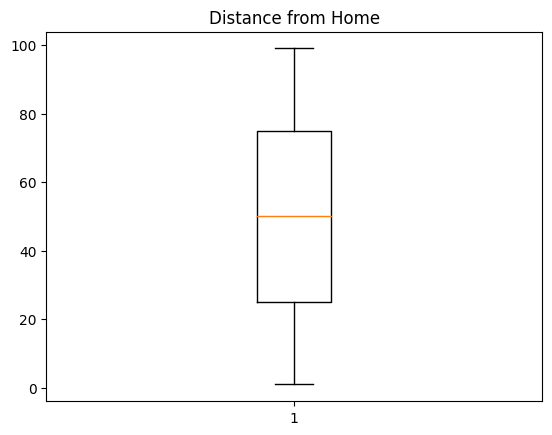

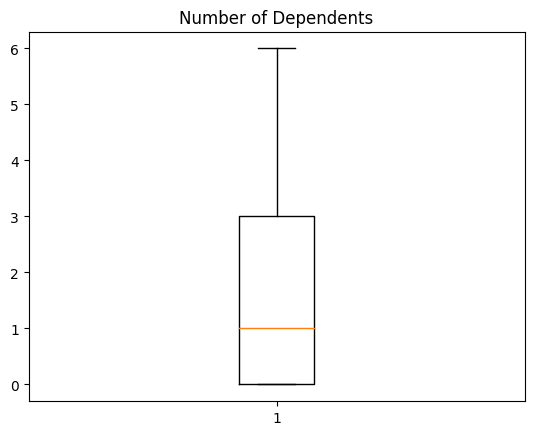

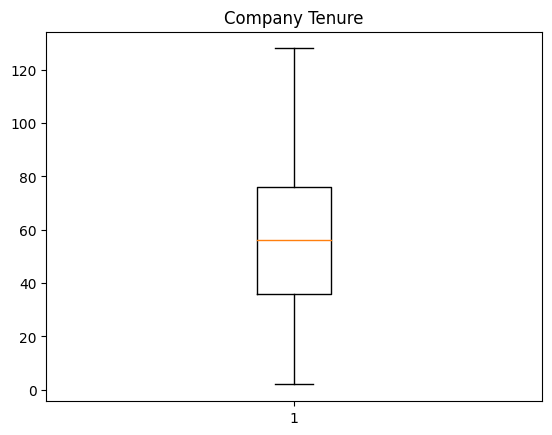

In [71]:
# box plot
for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i);

only years at company and monthly income feature has outliers

In [78]:
# outlier handling using IQR method
for i in num_columns:
  print('  ', i)
  print('  ----')
  print('Outlier handling of', i)
  #Calculating the interquartile range
  Q1 = np.percentile(df[i],25,method='midpoint')
  Q2 = np.percentile(df[i],50,method='midpoint')
  Q3 = np.percentile(df[i],75,method='midpoint')
  IQR =Q3 - Q1

  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]

  for x in df[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)


  print('outliers : ',outliers)
 # upper values and lower values are replaced by upper limit and lower limit (respectively)by using clip function
  #df[i] = df[i].clip(lower=low_lim ,upper=up_lim)



  #print('                        #--------------------------------------------------------------#')





   Age
  ----
Outlier handling of Age
Q1 is:  28.0
Q2 is:  39.0
Q3 is:  49.0
IQR = 21.0
lower limit =  -3.5
upper limit   80.5
outliers :  []
   Years at Company
  ----
Outlier handling of Years at Company
Q1 is:  7.0
Q2 is:  13.0
Q3 is:  23.0
IQR = 16.0
lower limit =  -17.0
upper limit   47.0
outliers :  [48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 

In [ ]:
plt.bar(df['Attrition'],df['Age'],color='Pink')
plt.title('age vs attrition ')
plt.xlabel('age')
plt.ylabel('attrition')
plt.show()

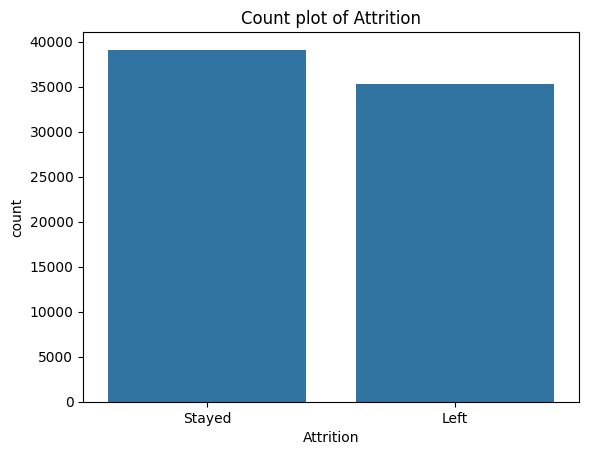

In [130]:
sns.countplot(x=df.Attrition )
plt.title('Count plot of Attrition');


<Axes: >

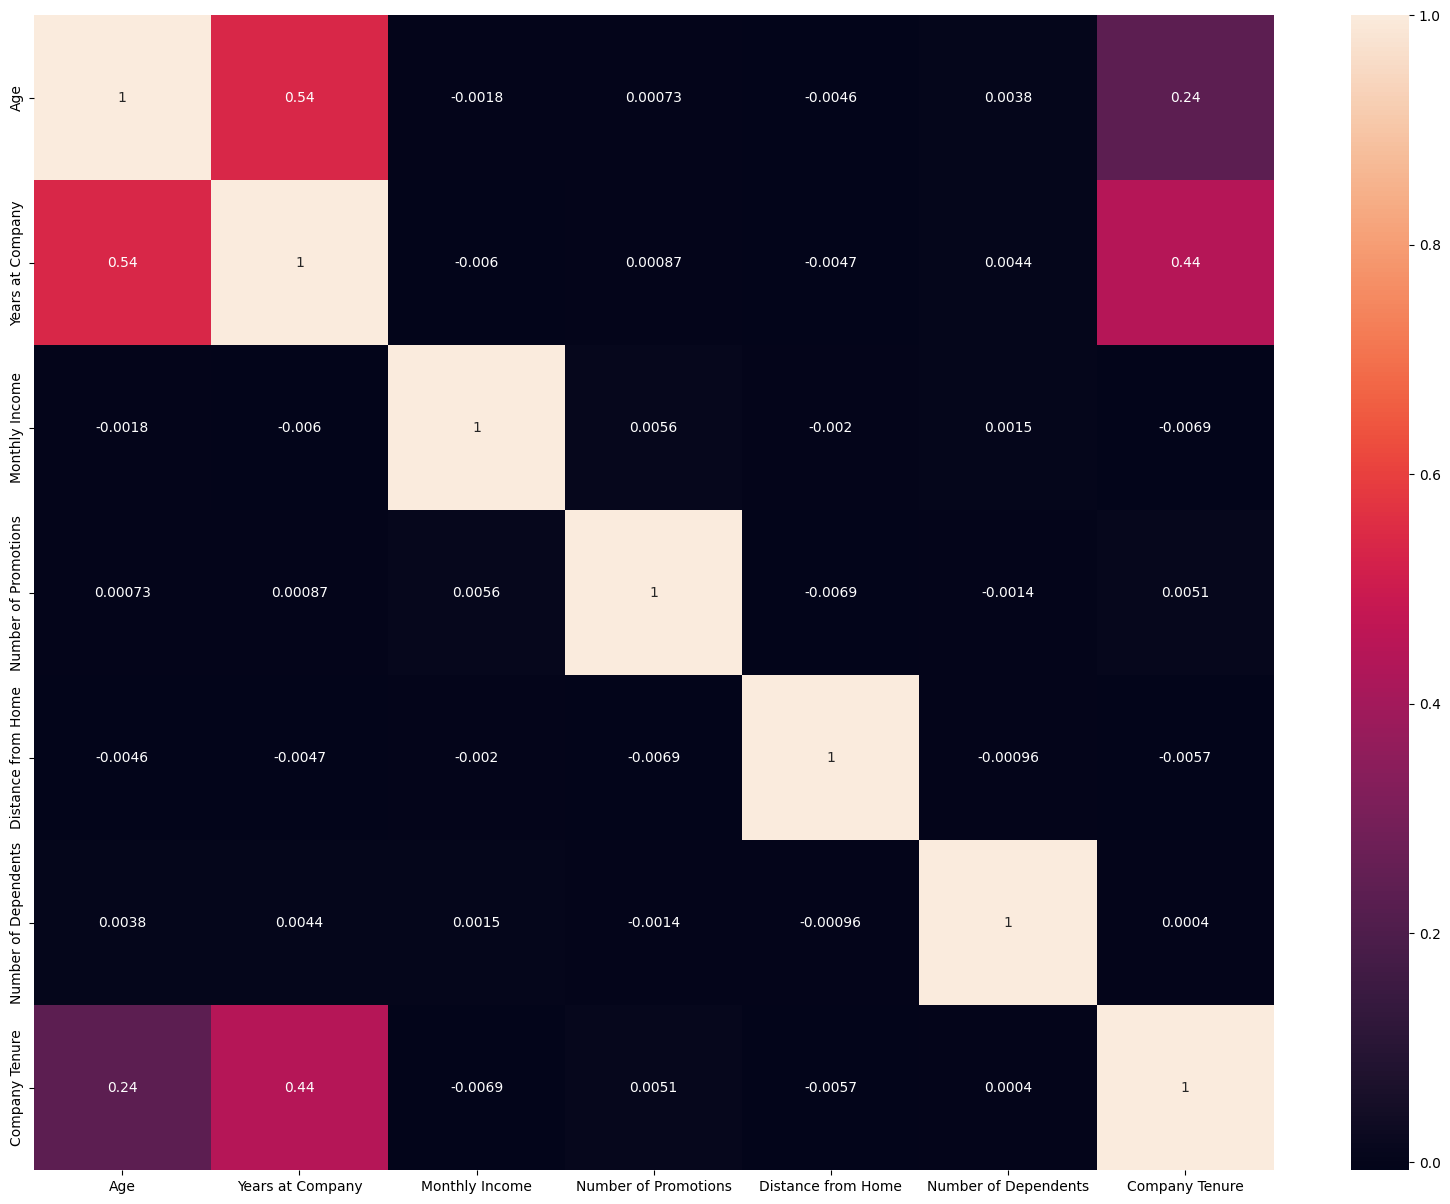

In [56]:
#correlation
plt.figure(figsize=(20,15))
sns.heatmap(num_columns.corr(),annot=True)

In [94]:
from sklearn.preprocessing import StandardScaler# using std. scaler
sc=StandardScaler()

In [95]:
#Label encoding
from sklearn.preprocessing  import LabelEncoder
label_encoder = LabelEncoder()
# FITTING THE TRANSFORM
obj=df.drop('Attrition',axis=1).select_dtypes(include='object')
for i in obj:
 df[i] = label_encoder.fit_transform(df[i])


In [96]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,Stayed
1,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,Stayed
2,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,Stayed
3,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,Stayed
4,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,Stayed


In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [107]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [108]:
x=sc.fit_transform(X) # scaled x
x=pd.DataFrame(x)
x.columns=X.columns

In [110]:
# splitting dataset for train and test
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)


In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [102]:
logi = LogisticRegression()
dtr = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
rfr = RandomForestClassifier()

models=[('Logistic Regression', logi),
              ('Decision Tree ', dtr),
              ('K-nearest Neighbour ', knn),
              ('Random Forest Regression', rfr)]

In [111]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}:\naccuracy: {accuracy:.4f}')

Logistic Regression:
accuracy: 0.7155
Decision Tree :
accuracy: 0.6619
K-nearest Neighbour :
accuracy: 0.6660
Random Forest Regression:
accuracy: 0.7477


In [ ]:
# using feature importance

In [113]:
importances = rfr.feature_importances_
feature_importances_df = pd.DataFrame({
    "feature": x_train.columns,
    "importance": importances*100
})

feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)
feature_importances_df

,feature,importance
14,Job Level,9.822310
10,Distance from Home,8.630780
12,Marital Status,8.554385
4,Monthly Income,8.340937
16,Company Tenure,7.764290
0,Age,7.135932
2,Years at Company,7.094186
17,Remote Work,4.813674
5,Work-Life Balance,4.452560
13,Number of Dependents,4.166100


droping some features based on importance table

In [119]:
x=x.drop(['Leadership Opportunities','Innovation Opportunities','Overtime','Gender','Company Size','Performance Rating'],axis=1)

In [120]:
# splitting dataset for train and test
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)


In [123]:
# RANDOM FOREST REGRESSION
model_rfr=rfr.fit(x_train, y_train)
y_pred = model_rfr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred=model_rfr.predict(x_test)
print('accuracy :', accuracy)

accuracy : 0.7391109718429653


In [122]:
model_rfr= RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy',min_samples_split=3)
model_rfr.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

here i'm using random forest classifier since it has the highset accuracy , for fitting the model missing values are dropped and used standard scaler for scaling and outlers are not handled(since using random forest regression)